# **MorQuest Code** 
**Morphodynamic Quick Assessment of Estuarine development under climate change**

In the following instance, an analysis is presented for the Alsea Bay case, as developed by Reyes, M. (2023). This analysis is outlined in the thesis entitled "Assessing Sea Level Rise Impact on Estuarine Morphodynamics," submitted to obtain the academic degree of Master in Water and Sustainable Development at IHE Delft. https://ihedelftrepository.contentdm.oclc.org/digital/collection/masters1/id/338392

## 1. Initial settings
Refer to the **Installation** section of the README for instructions on how to install the Python packages necessary to run the software.

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from morQuest import Run_morquest, morquest_set_input

## 2. Define study area
For this example, we will input the **Data Manually**. Therefore, this Jupyter notebook file can be used to conduct the analysis in a general manner.

In [2]:
title_text_bold = 'Alsea bay'  #Add the name of the case of Study

## 3. Input Data
In the initial phase of the study, the focus lies on the selection of comprehensive datasets that furnish sufficient information for subsequent analysis. Following this, the subsequent step involves gathering pertinent data, encompassing intertidal area (`Ai`), channel area (`Ac`), tidal difference (`dH`), river flow (`Qr`),change in sediment supply (`ssc`), closure depth (`cd`), dune height (`du`), active shorezone slope (`betas`), and sea level projection (`slr`). 

Furthermore, calibration and sensitivity parameters within the model were identified, as listed below.

- `incAi`: Rate of annual intertidal area expansion. 
- `erc`: Factor governing the entrapment of river-supplied sediment from the river into the channel.
- `ecs`: Factor controlling the entrapment of river-supplied sediment from the channel into the shoreline.
- `fis`: Factor for transport from river to intertidal area under river sediment supply change.
- `fs`: Factor responsible for the distribution of intertidal area deposition to intertidal area width and channel slope.
- `si`: Factor influencing the increase in intertidal area slope at its edge.
- `faw`: Factor responsible for reducing `fs` and `fis` in case of a decrease in yearly sediment transport from the river into the channel.


In [10]:
input_data = morquest_set_input(Ac=8557507,   #channel area, m2
                                Ai=5310447,   #intertidal area, m2
                                dH=2.46,      #tidal difference, m
                                Qr=38.95,     #river flow, m3/s
                                fQr=0,        #factor for river flow
                                ssc=0.1,      #river suspended sediment concentration, give always value to prevent div0, mg/l, g/m3
                                fssc=0,       #factor for ssc
                                slr=0.53,     #sea level rise after 'dur' years, m
                                lsys=5503,    #empirically derived; system length scale
                                cl=1e6,       #coastline length, m
                                betas=0.01,   #active shorezone slope [-]
                                cd=21.7,      #closure depth, m
                                fd=1.5,       #dune factor, m
                                du=10,        #dune height above active zone, for Bruun rule, m
                                por=0.4,      #porosity, -
                                rho=2650,     #sediment density, kg/m3
                                dur=100,       #timespan calculation, yr
                                T=43200,      #tidal period, s
                                slrtype='linear',  #sea level rise type: 'accel'/'linear'
                                incAi=0,      #increase it area per year as percentage of intertidal area at t=0,
                                tr=0,         #exchange from channel to shore as percentage of instantaneous total exchange
                                erc=0.5,      #maximun river supply entrapment portion from river into channel, -
                                ecs=0.5,      #maximum river supply entrapment portion from channel into shoreline, -
                                fis=0.5,      #calibration factor for transport from river to it area under river sedsupply change, 1 menas all excess sedimen supply to itarea, [0 1], -
                                si=0.10,       #factor increasing intertidal area slope at edge for slr computations ; smaller value implies less intertidal area under slr. 1 = linear. (no effect if ~ >10), [0 inf], -
                                fs=0.5,       #factor distributing it area deposition to it area width and channel slope, [0 1], -; 
                                faw=0.5       #factor diminishing fs and fis in case of lowering Qrc, [0 1], -;
                               )

## 4. Execution of the code

In [25]:
Run_morquest(input_data, 'output.mat')          #Save the file
data = scipy.io.loadmat('results/output.mat')   #Reading the file

Reading information from the `.mat` file

In [41]:
flattened_data = {}
for key, value in data.items():
    flattened_data[key] = np.ravel(value)
  
Ac= flattened_data['Ac']
Ai= flattened_data['Ai']
hc= flattened_data['hc']
hi= flattened_data['hi']
Vc= flattened_data['Vc']
Vi= flattened_data['Vi']
Vd= flattened_data['Vd']
Vs= flattened_data['Vs']
sedVc= flattened_data['sedVc']
sedVi= flattened_data['sedVi']
sedVd= flattened_data['sedVd']
sedVs= flattened_data['sedVs']
Qci= flattened_data['Qci']
Qcd= flattened_data['Qcd']
Qcs= flattened_data['Qcs']
Qso= flattened_data['Qso']
at= flattened_data['at']
slr=flattened_data['slr']
yr=flattened_data['yr']
dur=flattened_data['dur']

a1 = np.max(slr)/(dur + 1)
slr2 = np.arange(0,max(slr),a1)
a = max(yr)+1 

df = pd.DataFrame({'yr':yr, 'slr2': slr2, 'at': at, 'Ac': Ac, 'Ai': Ai, 'hc': hc, 'hi': hi, 'Vc': Vc, 'Vi': Vi, 'Vd': Vd,
                   'Vs': Vs, 'sedVc': sedVc, 'sedVi': sedVi, 'sedVd': sedVd, 'sedVs': sedVs, 'Qci': Qci, 'Qcd': Qcd,
                   'Qcs': Qcs, 'Qso': Qso,})
df.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1688\4097906678.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slr2 = np.arange(0,max(slr),a1)


,yr,slr2,at,Ac,Ai,hc,hi,Vc,Vi,Vd,Vs,sedVc,sedVi,sedVd,sedVs,Qci,Qcd,Qcs,Qso
0,0,0.000000,3.064372,8.557507e+06,5.310447e+06,1.100363,1.230000,9.416361e+06,6.531850e+06,4.115221e+06,3.531675e+10,0.000000,6.531850e+06,0.000000,0.00000,0.000000,0.000000,77253.283019,77253.283019
1,1,0.005248,2.957078,8.671919e+06,5.196035e+06,1.107338,1.208275,9.602746e+06,6.278238e+06,4.115221e+06,3.531675e+10,-13185.487466,6.503401e+06,0.000000,0.00000,8075.669949,5109.817516,77253.283019,38626.641509
2,2,0.010495,2.841770,8.783866e+06,5.084088e+06,1.115669,1.184483,9.799884e+06,6.022015e+06,4.120331e+06,3.531679e+10,-30925.411250,6.483641e+06,5109.817516,38626.64151,14221.618079,3518.305705,77253.283019,38626.641509
3,3,0.015743,2.720325,8.893401e+06,4.974553e+06,1.124339,1.158897,9.999197e+06,5.764992e+06,4.123849e+06,3.531683e+10,-51605.876814,6.470627e+06,8628.123221,77253.28302,18397.772547,2282.693017,77253.283019,38626.641509
4,4,0.020990,2.594721,9.000577e+06,4.867377e+06,1.133163,1.131826,1.019912e+07,5.509024e+06,4.126132e+06,3.531687e+10,-74194.774984,6.462376e+06,10910.816238,115879.92453,21178.210538,1410.687633,77253.283019,38626.641509


## 5. Graphical Representation of Results

The results extracted within morQuest enable analysis of how the main elements evolve over the analyzed time period
### 5.1. Intertidal Area, Channel Area and Adaptation Time Scale.

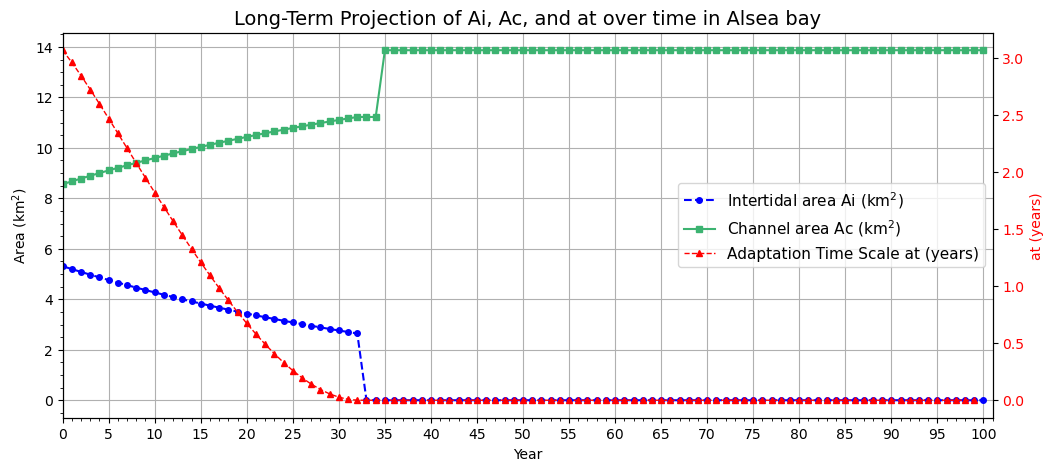

In [13]:
# Create a figure and axis for the primary scale (left)
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(111)

ax1.plot(yr, Ai/1000000, label = 'Intertidal area Ai (km$^2$)', linewidth=1.5, linestyle = '--', marker = 'o', markersize=4, color ="b")
ax1.plot(yr, Ac/1000000, label = 'Channel area Ac (km$^2$)', linewidth=1.5, linestyle = '-', marker = 's', markersize=4, color ="#3CB371")
ax1.set_xlabel('Year')
ax1.set_ylabel('Area (km$^2$)')
ax1.tick_params(axis='y')
plt.grid()
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)

# Create a secondary axis for the second scale (right)
ax2 = ax1.twinx()
ax2.plot(yr, at, label = 'Adaptation Time Scale at (years)', linewidth=1, linestyle = '--', marker = '^', markersize=4, color= 'r')
ax2.set_ylabel('at (years)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add legends for both scales
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='best', fontsize=11)

plt.title(f'Long-Term Projection of Ai, Ac, and at over time in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/01-Long-Term Trajectory of Ai, Ac and at over time in {title_text_bold}.png', bbox_inches='tight')

### 5.2. Intertidal Depth and Channel Depth.

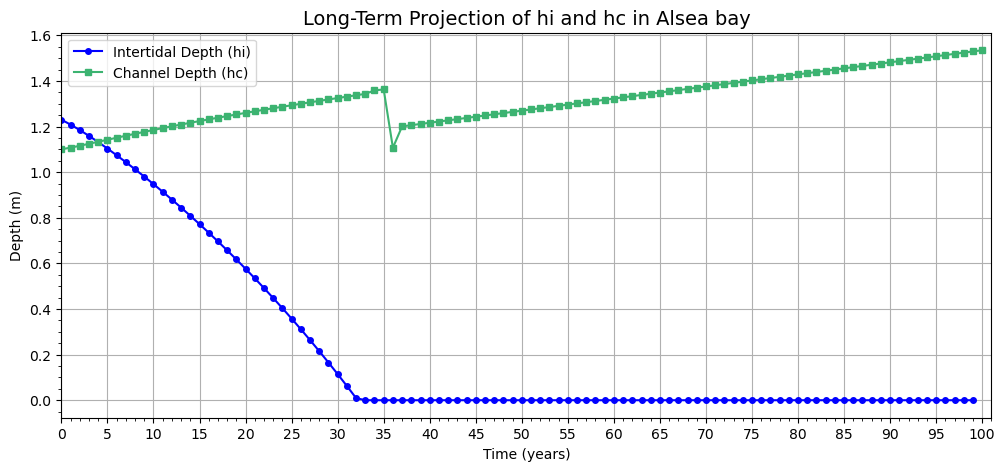

In [14]:
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, hi, label = 'Intertidal Depth (hi)', color='b',linewidth = 1.5, linestyle = '-',marker='o', markersize=4)
plt.plot(yr, hc, label = 'Channel Depth (hc)', color='#3CB371',linewidth = 1.5, linestyle = '-',marker='s', markersize=4)
#plt.plot(output['yr'], slr2, label = 'Sea Level',color='#00008B',linewidth = 1.5, linestyle = '-',marker='v', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Depth (m)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)
plt.title(f'Long-Term Projection of hi and hc in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/02-Long-Term Trajectory of hi and hc in {title_text_bold}.png', bbox_inches='tight')

### 5.3. Intertidal, Channel and Delta Volume

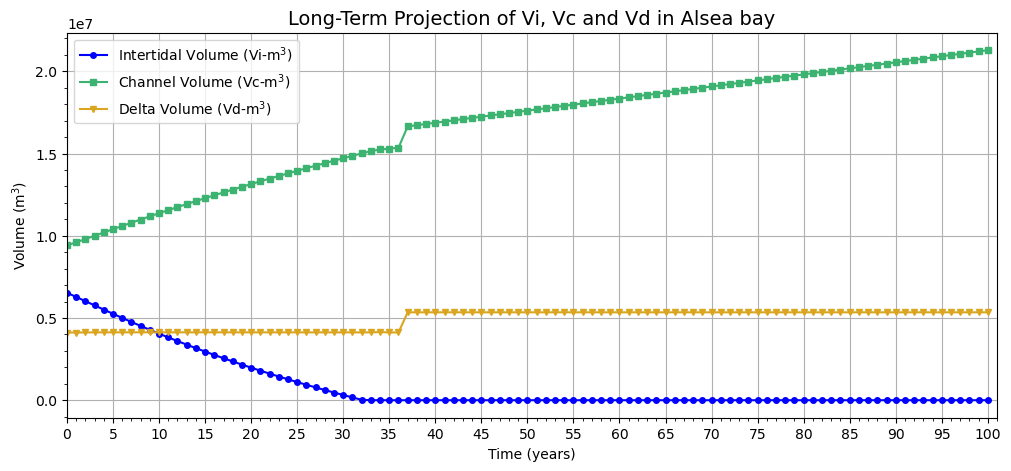

In [15]:
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, Vi, label = 'Intertidal Volume (Vi-m$^3$)', color='b',linewidth = 1.5, linestyle = '-',marker='o', markersize=4)
plt.plot(yr, Vc, label = 'Channel Volume (Vc-m$^3$)', color='#3CB371',linewidth = 1.5, linestyle = '-',marker='s', markersize=4)
plt.plot(yr, Vd, label = 'Delta Volume (Vd-m$^3$)',color='#DAA520',linewidth = 1.5, linestyle = '-',marker='v', markersize=4)
#plt.plot(yr, Vs, label = 'Shoreline Volume (Vs)',color='#8B008B',linewidth = 1.5, linestyle = '-',marker='*', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Volume (m$^3$)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)
plt.title(f'Long-Term Projection of Vi, Vc and Vd in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/03-Long-Term Trajectory of Vi, Vc and Vd in {title_text_bold}.png', bbox_inches='tight')

### 5.4. Intertidal, Channel and Delta Sed Volume

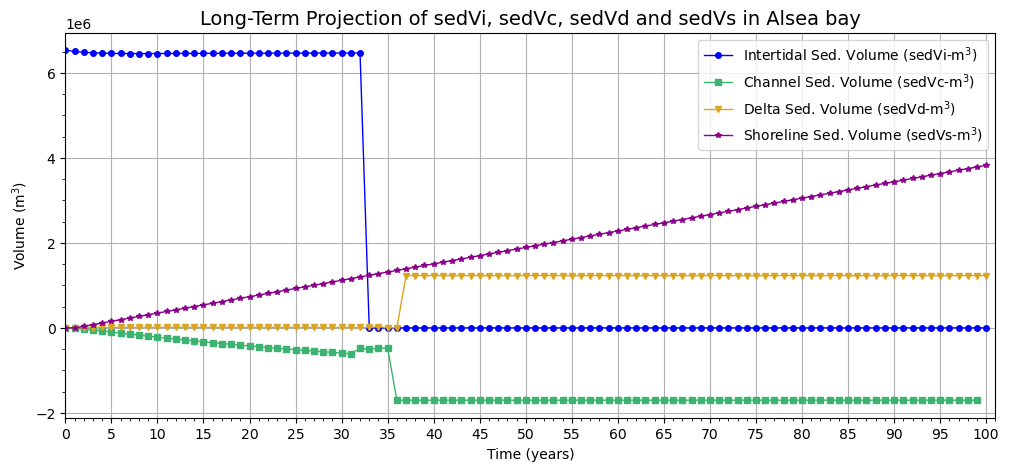

In [16]:
#PLOTEO 
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, sedVi, label = 'Intertidal Sed. Volume (sedVi-m$^3$)', color='b',linewidth = 1., linestyle = '-',marker='o', markersize=4)
plt.plot(yr, sedVc, label = 'Channel Sed. Volume (sedVc-m$^3$)', color='#3CB371',linewidth = 1., linestyle = '-',marker='s', markersize=4)
plt.plot(yr, sedVd, label = 'Delta Sed. Volume (sedVd-m$^3$)',color='#DAA520',linewidth = 1., linestyle = '-',marker='v', markersize=4)
plt.plot(yr, sedVs, label = 'Shoreline Sed. Volume (sedVs-m$^3$)',color='#8B008B',linewidth = 1., linestyle = '-',marker='*', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)

plt.ylabel('Volume (m$^3$)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.legend()
plt.grid(True)

plt.title(f'Long-Term Projection of sedVi, sedVc, sedVd and sedVs in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/04-Long-Term Trajectory of sedVi, sedVc, sedVd and sedVs in {title_text_bold}.png', bbox_inches='tight')

### 5.5. Qci, Qcd, Qcs and Qso

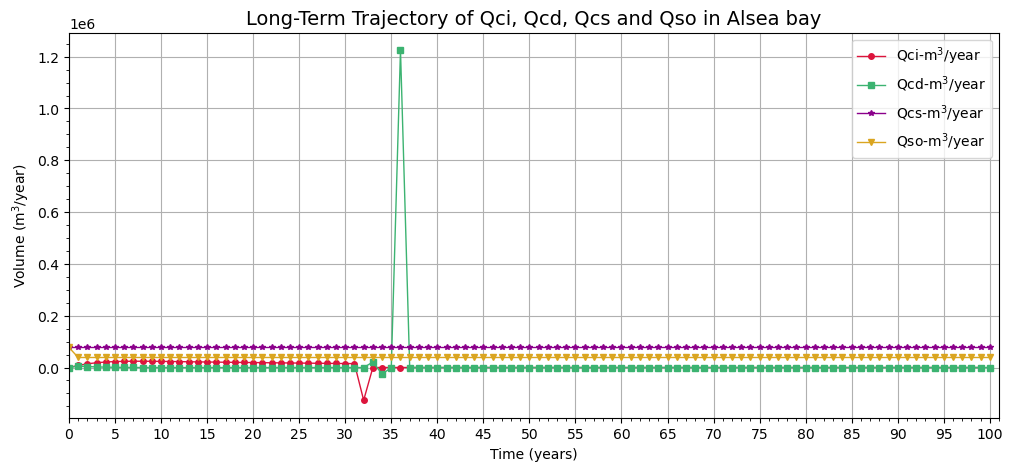

In [17]:
#PLOTEO 
fig = plt.figure(figsize=(12,5))
#plt.subplot(231)
plt.plot(yr, Qci, label = 'Qci-m$^3$/year', color='#DC143C',linewidth = 1., linestyle = '-',marker='o', markersize=4)
plt.plot(yr, Qcd, label = 'Qcd-m$^3$/year', color='#3CB371',linewidth = 1., linestyle = '-',marker='s', markersize=4)
plt.plot(yr, Qcs, label = 'Qcs-m$^3$/year',color='#8B008B',linewidth = 1., linestyle = '-',marker='*', markersize=4)
plt.plot(yr, Qso, label = 'Qso-m$^3$/year',color='#DAA520',linewidth = 1., linestyle = '-',marker='v', markersize=4)
plt.legend([], borderpad=0.5, labelspacing=1.0, fontsize=15)
plt.xticks(np.arange(0,a,5))
plt.xlim(0,a)
plt.ylabel('Volume (m$^3$/year)')
plt.xlabel('Time (years)')
plt.minorticks_on()
plt.legend()
plt.grid(True)

plt.title(f'Long-Term Trajectory of Qci, Qcd, Qcs and Qso in {title_text_bold}', fontsize=14, color="black")
plt.savefig(f'results/05-Long-Term Trajectory of Qci, Qcd, Qcs and Qso in {title_text_bold}.png', bbox_inches='tight')
